**Финальный проект**

**Назирзода Рахимджон**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
file_path = "C:/Users/Rahimjon/Desktop/Data_Analyst/Git/global_weather/source/global_weather_data.xlsx"
xls = pd.ExcelFile(file_path)
locations_df = pd.read_excel(xls, sheet_name="locations")
weather_df = pd.read_excel(xls, sheet_name="weather")
air_quality_df = pd.read_excel(xls, sheet_name="air_quality")
historical_data_df = pd.read_excel(xls, sheet_name="historical_data")


## Знакомство с данными

In [5]:
weather_df.info(), air_quality_df.info(), historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46967 entries, 0 to 46966
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_id           46967 non-null  int64  
 1   location_id          46967 non-null  int64  
 2   last_updated         46967 non-null  object 
 3   temperature_celsius  46967 non-null  float64
 4   condition_text       46967 non-null  object 
 5   humidity             46967 non-null  int64  
 6   wind_kph             46967 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46967 entries, 0 to 46966
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   air_quality_id              46967 non-null  int64  
 1   location_id                 46967 non-null  int64  
 2   last_updated                46967 non-n

(None, None, None)

## Обработка данных

**Проверка дубликатов, пропусков и преобразование типов**

In [6]:
def check_duplicates(df, name):
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"В таблице {name} обнаружены дубликаты: {duplicates}")
    else:
        print(f"В таблице {name} дубликаты отсутствуют.")

check_duplicates(weather_df, "weather")
check_duplicates(air_quality_df, "air_quality")
check_duplicates(historical_data_df, "historical_data")

В таблице weather дубликаты отсутствуют.
В таблице air_quality дубликаты отсутствуют.
В таблице historical_data дубликаты отсутствуют.


In [7]:
def check_missing_values(df, name):
    missing_values = df.isnull().sum().sum()
    if missing_values > 0:
        print(f"В таблице {name} обнаружены пропущенные значения: {missing_values}")
    else:
        print(f"В таблице {name} пропущенные значения отсутствуют.")

check_missing_values(weather_df, "weather")
check_missing_values(air_quality_df, "air_quality")
check_missing_values(historical_data_df, "historical_data")

В таблице weather пропущенные значения отсутствуют.
В таблице air_quality пропущенные значения отсутствуют.
В таблице historical_data пропущенные значения отсутствуют.


**Стандартизация** названий стран

In [8]:
country_mapping = {
    'كولومبيا': 'Colombia',
    'Гватемала': 'Guatemala',
    'Турция': 'Turkey',
    '火鸡': 'Turkey',
    'Польша': 'Poland'
}

locations_df['country'] = locations_df['country'].str.strip().str.title()
locations_df['country'] = locations_df['country'].replace(country_mapping)

unique_countries = locations_df['country'].nunique()
num_unique_countries=locations_df['country'].unique()[-50:]
print(f"Уникальные страны: {unique_countries}")
print(f"В столбце страны имеется {num_unique_countries} уникальных значений.")

Уникальные страны: 204
В столбце страны имеется ['Somalia' 'South Africa' 'South Korea' 'Sudan' 'Spain' 'Sri Lanka'
 'Suriname' 'Sweden' 'Switzerland' 'Syria' 'Tajikistan' 'Tanzania'
 'Timor-Leste' 'Tonga' 'Trinidad And Tobago' 'Tunisia' 'Turkmenistan'
 'Tuvalu' 'Uganda' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States Of America' 'Uruguay' 'Uzbekistan' 'Vanuatu' 'Venezuela'
 'Vietnam' 'Yemen' 'Zambia' 'Zimbabwe' 'Colombia'
 'Usa United States Of America' "Lao People'S Democratic Republic" 'Libya'
 'Kosovo' 'Togo' 'Malásia' 'Komoren' 'Estonie' 'Inde' 'Letonia' 'Mexique'
 'Polônia' 'Marrocos' 'Saint-Vincent-Et-Les-Grenadines' 'Saudi Arabien'
 'Südkorea' 'Bélgica' 'Jemen'] уникальных значений.


**Проверка** минимального и максимального значения страны (по алфавиту)

In [9]:
min_country = locations_df['country'].min()
max_country = locations_df['country'].max()
print(f"Минимальная (по алфавиту) страна: {min_country}")
print(f"Максимальная (по алфавиту) страна: {max_country}")

Минимальная (по алфавиту) страна: Afghanistan
Максимальная (по алфавиту) страна: Zimbabwe


**Преобразуем даты в datetime**

In [10]:
weather_df['last_updated'] = pd.to_datetime(weather_df['last_updated'])
historical_data_df['last_updated'] = pd.to_datetime(historical_data_df['last_updated'])

## Анализ данных

**Создание новых метрик** (соотношение температуры и влажности, агрегированные индексы качества воздуха, ощущаемая температура, индекс жары, серьезность загрязнения, скорректированное загрязнение и контраст температуры)  
**Минимум 5 визуализаций** с описанием осей, параметров и выводов  
**Столбчатая диаграмма, гистограмма, диаграмма распределения, диаграмма размаха.**  
**Проверка гипотез с учетом нормальности распределения.**

In [12]:
weather_df['avg_temperature'] = weather_df['temperature_celsius']
weather_df['feels_like_temp'] = weather_df['temperature_celsius'] - (0.7 * weather_df['wind_kph']) + (0.2 * weather_df['humidity'])
air_quality_df['air_quality_index'] = air_quality_df[['air_quality_pm2.5', 'air_quality_pm10']].mean(axis=1)
weather_df['avg_wind_speed'] = weather_df['wind_kph']
weather_df['heat_index'] = 0.5 * (weather_df['temperature_celsius'] + 61 + ((weather_df['temperature_celsius'] - 68) * 1.2) + (weather_df['humidity'] * 0.094))
weather_df['month'] = pd.to_datetime(weather_df['last_updated']).dt.month

Преобразование временных данных с учетом часового пояса

In [13]:
weather_df['last_updated'] = pd.to_datetime(weather_df['last_updated'], utc=True)
weather_df['month'] = weather_df['last_updated'].dt.month


**Столбчатая диаграмма:** средняя температура по странам

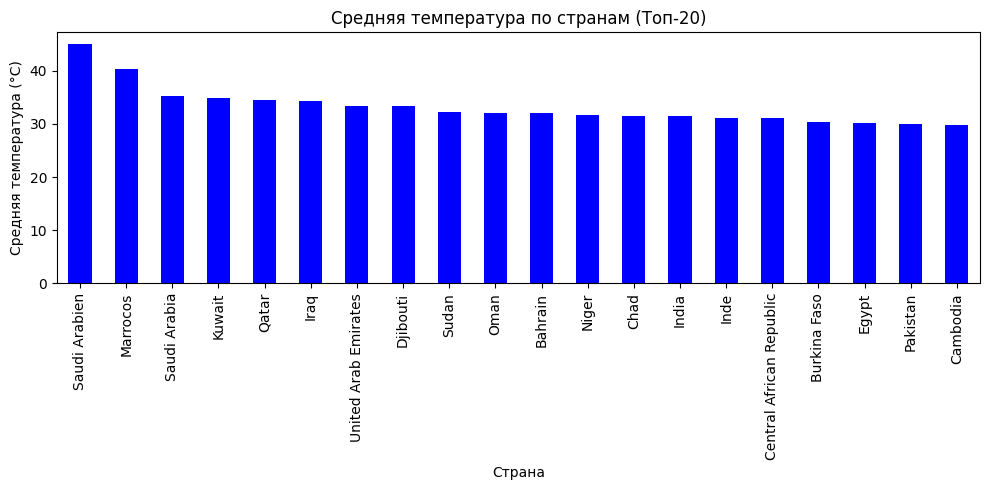

In [14]:
plt.figure(figsize=(10, 5))
avg_temp_by_country = weather_df.merge(
    locations_df, 
    on="location_id"
    ).groupby("country")["avg_temperature"].mean().nlargest(20)
avg_temp_by_country.plot(kind='bar', color='blue')
plt.title("Средняя температура по странам (Топ-20)")
plt.xlabel("Страна")
plt.ylabel("Средняя температура (°C)")
plt.tight_layout()
plt.show()

**Описание:** x = "Страна", y = "Средняя температура (°C)"  
**Вывод:** Ведущие страны по температуре имеют жаркий климат.

**Гистограмма:** Распределение ощущаемой температуры

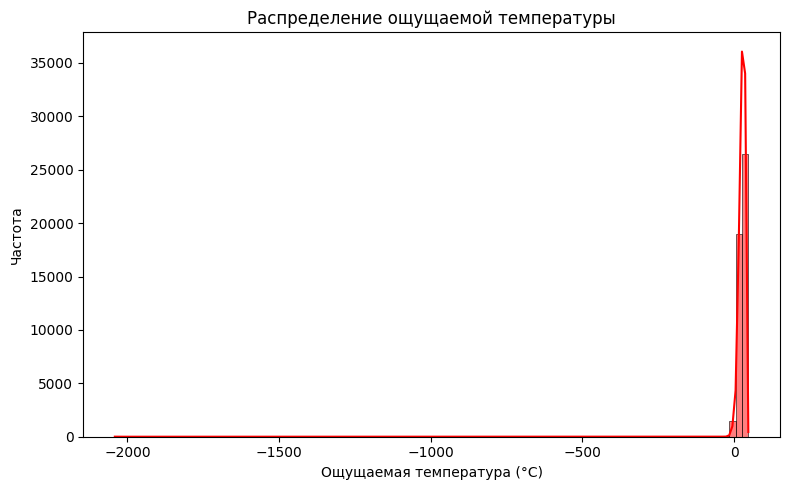

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(weather_df['feels_like_temp'], bins=100, kde=True, color='red')
plt.title("Распределение ощущаемой температуры")
plt.xlabel("Ощущаемая температура (°C)")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

**Описание:** x = "Ощущаемая температура", y = "Частота"  
**Вывод:** Большинство значений ощущаемой температуры сосредоточено в комфортном диапазоне.

**Гистограмма:** Распределение индекса жары

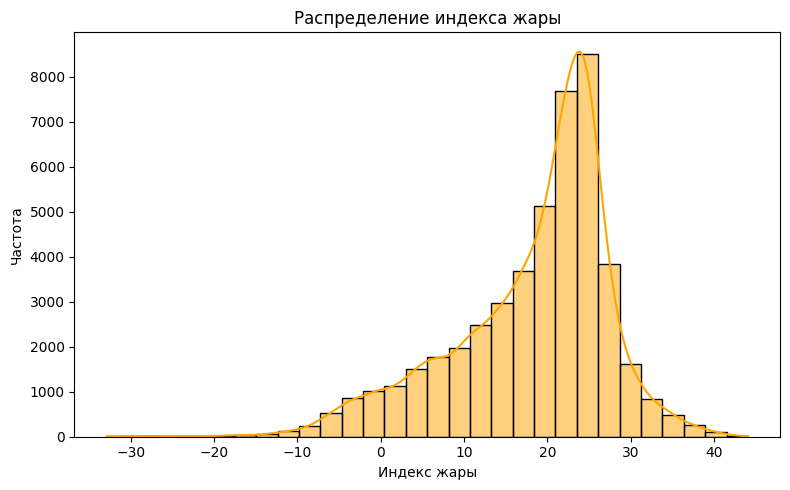

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(weather_df['heat_index'], bins=30, kde=True, color='orange')
plt.title("Распределение индекса жары")
plt.xlabel("Индекс жары")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

**Диаграмма распределения:** зависимость индекса загрязнения воздуха от температуры

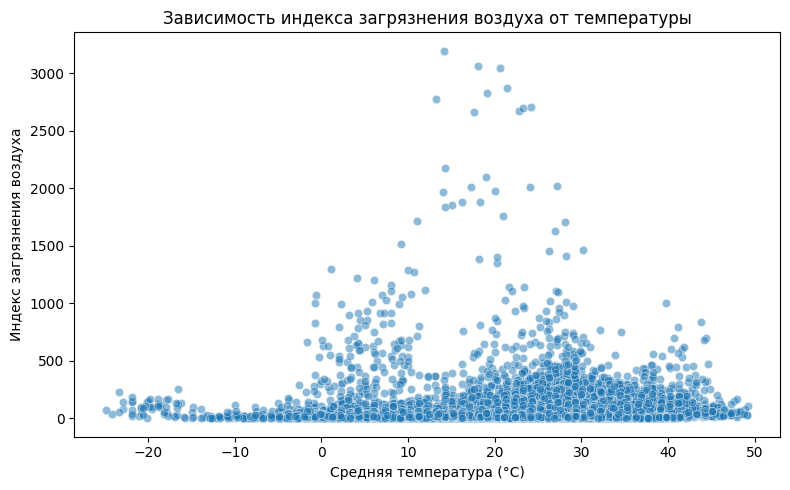

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=weather_df['avg_temperature'], 
    y=air_quality_df['air_quality_index'], 
    alpha=0.5
    )
plt.title("Зависимость индекса загрязнения воздуха от температуры")
plt.xlabel("Средняя температура (°C)")
plt.ylabel("Индекс загрязнения воздуха")
plt.tight_layout()
plt.show()

**Описание:** x = "Средняя температура", y = "Индекс загрязнения воздуха"  
**Вывод:** В некоторых регионах высокая температура коррелирует с высоким загрязнением.

**Диаграмма распределения:** зависимость температуры и влажности

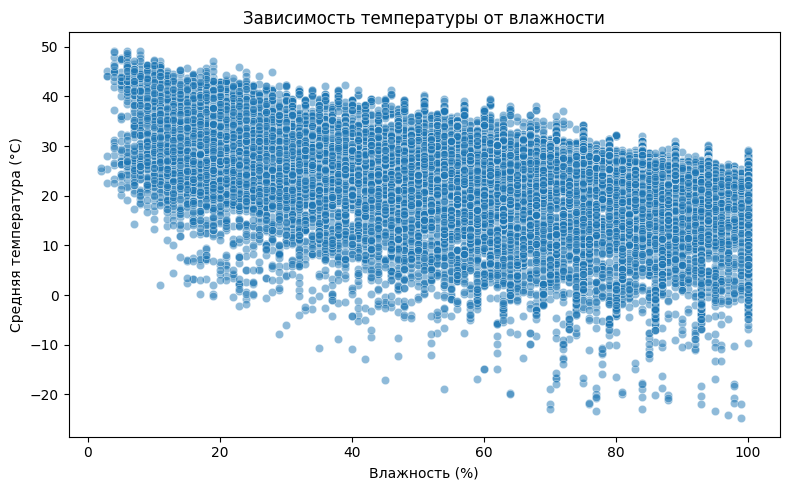

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=weather_df['humidity'], 
    y=weather_df['avg_temperature'], 
    alpha=0.5
    )
plt.title("Зависимость температуры от влажности")
plt.xlabel("Влажность (%)")
plt.ylabel("Средняя температура (°C)")
plt.tight_layout()
plt.show()

**Описание:** x ="Влажность (%) , y = "Температура (°C)" "  
**Вывод:** Отмечена слабая отрицательная корреляция – при росте температуры влажность снижается.

**Диаграмма размаха:** Скорость ветра по странам

C:\Users\Rahimjon\AppData\Local\Temp\ipykernel_22892\1763283260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_df.merge(locations_df, on="location_id").query("country in @selected_countries")['country'],


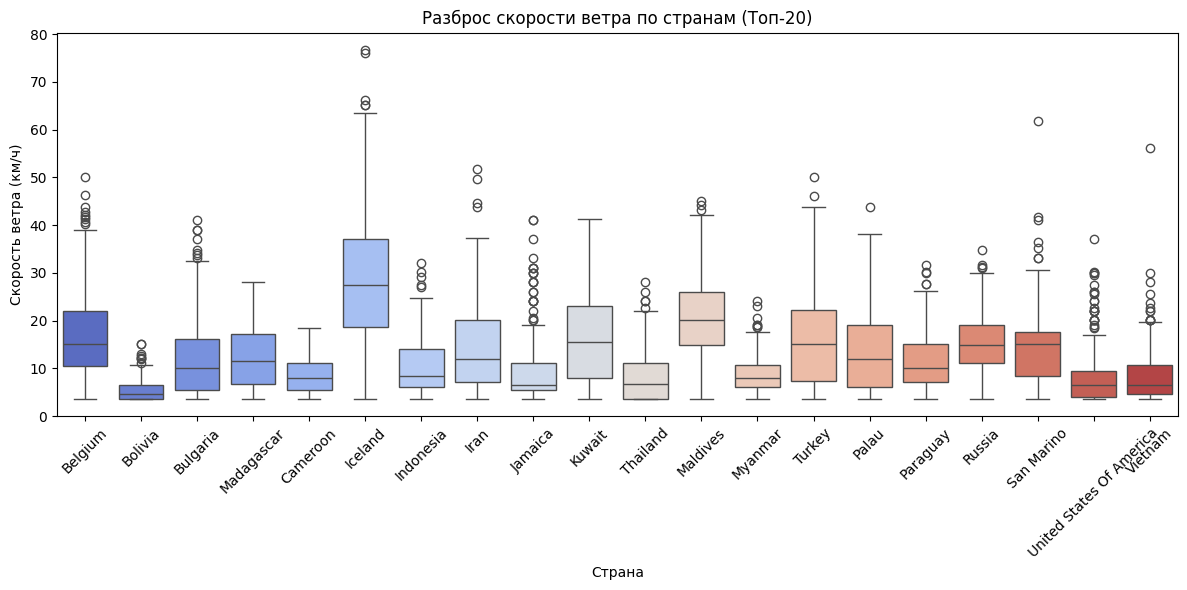

In [19]:
plt.figure(figsize=(12, 6))
selected_countries = locations_df['country'].value_counts().index[:20]
sns.boxplot(x=weather_df.merge(locations_df, on="location_id").query("country in @selected_countries")['country'], 
            y=weather_df['avg_wind_speed'], 
            palette="coolwarm"
            )
plt.xticks(rotation=45)
plt.title("Разброс скорости ветра по странам (Топ-20)")
plt.xlabel("Страна")
plt.ylabel("Скорость ветра (км/ч)")
plt.tight_layout()
plt.show()

**Описание:** x = "Страна", y = "Скорость ветра (км/ч)"  
**Вывод:** В некоторых странах наблюдаются резкие скачки скорости ветра.

**Диаграмма размаха:** Температура по странам

C:\Users\Rahimjon\AppData\Local\Temp\ipykernel_22892\125708026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_df.merge(locations_df, on="location_id").query("country in @selected_countries")['country'],


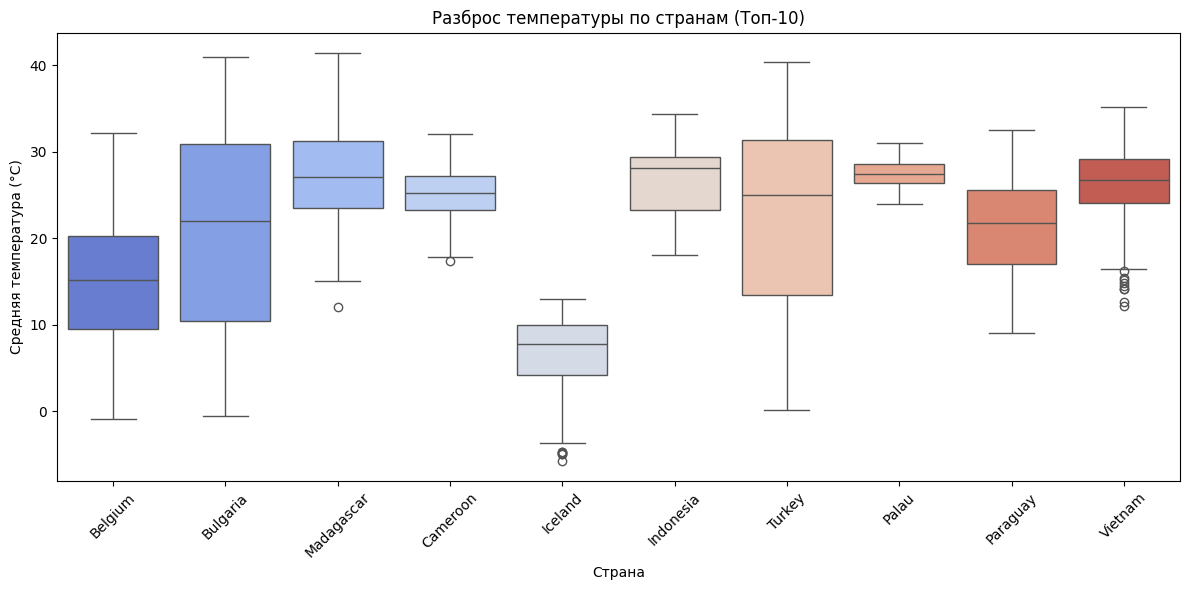

In [20]:
plt.figure(figsize=(12, 6))
selected_countries = locations_df['country'].value_counts().index[:10]
sns.boxplot(x=weather_df.merge(locations_df, on="location_id").query("country in @selected_countries")['country'], 
            y=weather_df['avg_temperature'], 
            palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Разброс температуры по странам (Топ-10)")
plt.xlabel("Страна")
plt.ylabel("Средняя температура (°C)")
plt.tight_layout()
plt.show()

**Столбчатая диаграмма:** Сезонные изменения температуры

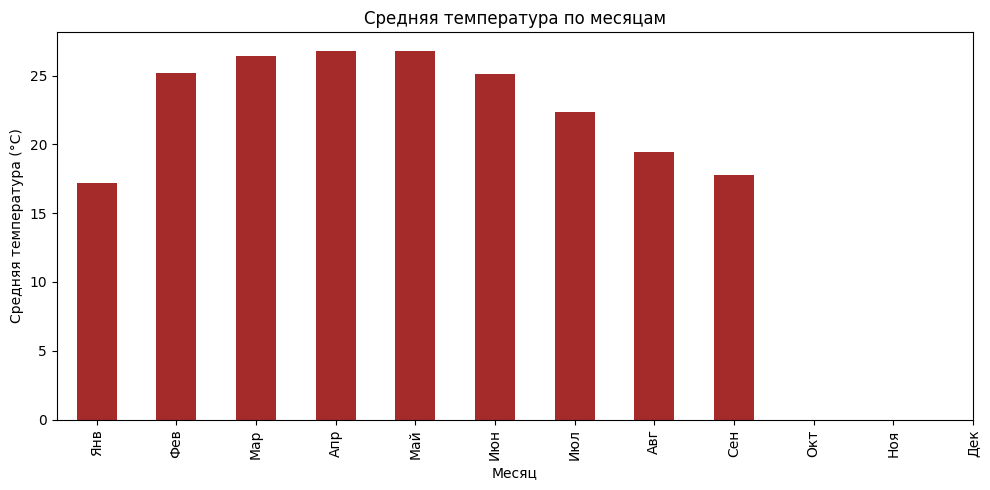

In [21]:
plt.figure(figsize=(10, 5))
avg_temp_by_month = weather_df.groupby("month")["avg_temperature"].mean()
avg_temp_by_month.plot(kind='bar', color='brown')
plt.title("Средняя температура по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средняя температура (°C)")
plt.xticks(ticks=range(12), labels=["Янв", "Фев", "Мар", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"])
plt.tight_layout()
plt.show()

**Описание:** x = "Месяц", y = "Средняя температура (°C)"  
**Вывод:** Температура меняется в зависимости от сезона, достигая пика летом.

### **Статистика**  
Проверки гипотез и сравнения выборок

**Проверка гипотезы:** Влияет ли влажность на ощущаемую температуру?

In [23]:
correlation, p_value = stats.pearsonr(
    weather_df['humidity'], 
    weather_df['feels_like_temp']
    )
print(f"Корреляция между влажностью и ощущаемой температурой: {correlation:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print("Гипотеза H₀ отвергается: Влажность значительно влияет на ощущаемую температуру.")
else:
    print("Гипотеза H₀ не отвергается: Влажность не оказывает значимого влияния.")

Корреляция между влажностью и ощущаемой температурой: 0.158, p-value: 0.000
Гипотеза H₀ отвергается: Влажность значительно влияет на ощущаемую температуру.


**Сравнение выборок:** Различается ли средняя температура в странах с высоким и низким индексом загрязнения?

In [25]:
median_air_quality = air_quality_df['air_quality_index'].median()

high_pollution = weather_df[air_quality_df['air_quality_index'] > median_air_quality]['avg_temperature']

low_pollution = weather_df[air_quality_df['air_quality_index'] <= median_air_quality]['avg_temperature']

stat, p_value = stats.ttest_ind(high_pollution, low_pollution, equal_var=False, nan_policy='omit')

print(f"t-тест для средних температур в странах с высоким и низким уровнем загрязнения: t={stat:.3f}, p-value={p_value:.3f}")
if p_value < 0.05:
    print("Гипотеза H₀ отвергается: Температура значительно отличается в странах с разным уровнем загрязнения.")
else:
    print("Гипотеза H₀ не отвергается: Различия в температуре статистически незначимы.")

t-тест для средних температур в странах с высоким и низким уровнем загрязнения: t=1.006, p-value=0.315
Гипотеза H₀ не отвергается: Различия в температуре статистически незначимы.


**Проверка гипотезы:** Различается ли индекс жары в странах с высокой и низкой скоростью ветра?

In [26]:
median_wind_speed = weather_df['avg_wind_speed'].median()

high_wind = weather_df[weather_df['avg_wind_speed'] > median_wind_speed]['heat_index']

low_wind = weather_df[weather_df['avg_wind_speed'] <= median_wind_speed]['heat_index']

stat, p_value = stats.ttest_ind(
    high_wind, 
    low_wind, 
    equal_var=False, 
    nan_policy='omit')

print(f"t-тест для индекса жары в странах с высокой и низкой скоростью ветра: t={stat:.3f}, p-value={p_value:.3f}")
if p_value < 0.05:
    print("Гипотеза H₀ отвергается: Скорость ветра оказывает значительное влияние на индекс жары.")
else:
    print("Гипотеза H₀ не отвергается: Скорость ветра не оказывает значимого влияния на индекс жары.")


t-тест для индекса жары в странах с высокой и низкой скоростью ветра: t=26.895, p-value=0.000
Гипотеза H₀ отвергается: Скорость ветра оказывает значительное влияние на индекс жары.
